In [1]:
from tensorflow.keras.applications import EfficientNetB0
import tensorflow as tf
import numpy as np
import os
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
####### Question 3 - Part 2

model = EfficientNetB0(weights="imagenet")
image = tf.keras.preprocessing.image.load_img('/content/Picture.jpg',  grayscale=False, color_mode="rgb", target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = model.predict(input_arr)
print(np.argsort(predictions)[0][::-1][0:3])

1/1 [==============================] - 2s 2s/step
[710 481 844]


In [ ]:
####### Question 3 - Part 3

def load_image(path, target_size_tuple):
  image = tf.keras.preprocessing.image.load_img(path, grayscale=False, color_mode="rgb", target_size=target_size_tuple)
  input_arr = tf.keras.preprocessing.image.img_to_array(image)
  return input_arr

train_path = '/content/data/train'
test_path = '/content/data/test'

x_train = np.array([load_image(os.path.join(train_path, img_name), (224, 224)) for img_name in os.listdir(train_path)])
x_test = np.array([load_image(os.path.join(test_path, img_name), (224, 224)) for img_name in os.listdir(test_path)])

results = np.argmax(model.predict(x_test), axis=0).tolist()
print('the most predicted label is:', max(set(results), key=results.count))

1/1 [==============================] - 2s 2s/step
the most predicted label is: 14


In [ ]:
model = EfficientNetB0(weights="imagenet")
model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss="categorical_crossentropy", metrics=['accuracy'])

y_train = to_categorical(np.ones((len(x_train), 1))* 327, num_classes=1000)
y_test = to_categorical(np.ones((len(x_test), 1))* 327, num_classes=1000)

history = model.fit(x_train, y_train, epochs=40, validation_data = (x_test, y_test), batch_size=25)

Epoch 1/40
2/2 [==============================] - 28s 10s/step - loss: 7.4802 - accuracy: 0.0000e+00 - val_loss: 6.8508 - val_accuracy: 0.0000e+00
Epoch 2/40
2/2 [==============================] - 15s 8s/step - loss: 7.4627 - accuracy: 0.0000e+00 - val_loss: 6.7843 - val_accuracy: 0.0000e+00
Epoch 3/40
2/2 [==============================] - 15s 8s/step - loss: 7.4505 - accuracy: 0.0000e+00 - val_loss: 6.7228 - val_accuracy: 0.0455
Epoch 4/40
2/2 [==============================] - 15s 8s/step - loss: 7.3159 - accuracy: 0.0000e+00 - val_loss: 6.6626 - val_accuracy: 0.0455
Epoch 5/40
2/2 [==============================] - 17s 10s/step - loss: 7.3480 - accuracy: 0.0000e+00 - val_loss: 6.6028 - val_accuracy: 0.0455
Epoch 6/40
2/2 [==============================] - 15s 8s/step - loss: 7.3814 - accuracy: 0.0000e+00 - val_loss: 6.5475 - val_accuracy: 0.0455
Epoch 7/40
2/2 [==============================] - 15s 8s/step - loss: 7.3091 - accuracy: 0.0000e+00 - val_loss: 6.4899 - val_accuracy: 0.0

In [2]:
def plot_hist(hist):

    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")

    plt.show()

    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")

    plt.show()

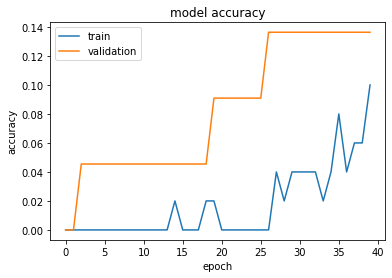

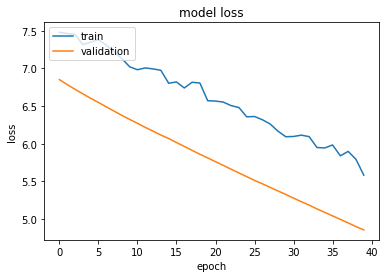

In [ ]:
plot_hist(history)

In [3]:
def load_image(path, target_size_tuple):
  image = tf.keras.preprocessing.image.load_img(path, grayscale=False, color_mode="rgb", target_size=target_size_tuple)
  input_arr = tf.keras.preprocessing.image.img_to_array(image)
  return input_arr


In [9]:
####### Question 3 - Part 4

ridgeback_path = '/content/new_data/Ridgeback'
samoyed_path = '/content/new_data/Samoyed'

ridgeback = np.array([load_image(os.path.join(ridgeback_path, img_name), (224, 224)) for img_name in os.listdir(ridgeback_path)])
samoyed = np.array([load_image(os.path.join(samoyed_path, img_name), (224, 224)) for img_name in os.listdir(samoyed_path)])

y_ridgeback = to_categorical(np.ones((len(ridgeback), 1))* 159, num_classes=1000)
y_samoyed = to_categorical(np.ones((len(samoyed), 1))* 258, num_classes=1000)

X = np.concatenate((samoyed, ridgeback))
Y = np.concatenate((y_samoyed, y_ridgeback))

x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, shuffle= True)

model = EfficientNetB0(weights="imagenet")
model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss="categorical_crossentropy", metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid) , batch_size=64)

Epoch 1/100
7/7 [==============================] - 13s 778ms/step - loss: 6.0461 - accuracy: 0.0525 - val_loss: 0.7743 - val_accuracy: 0.8500
Epoch 2/100
7/7 [==============================] - 4s 573ms/step - loss: 5.8264 - accuracy: 0.0775 - val_loss: 0.7993 - val_accuracy: 0.8400
Epoch 3/100
7/7 [==============================] - 4s 563ms/step - loss: 5.6950 - accuracy: 0.0625 - val_loss: 0.8174 - val_accuracy: 0.8500
Epoch 4/100
7/7 [==============================] - 4s 556ms/step - loss: 5.5983 - accuracy: 0.0875 - val_loss: 0.8294 - val_accuracy: 0.8500
Epoch 5/100
7/7 [==============================] - 4s 569ms/step - loss: 5.4298 - accuracy: 0.1200 - val_loss: 0.8398 - val_accuracy: 0.8500
Epoch 6/100
7/7 [==============================] - 4s 553ms/step - loss: 5.3162 - accuracy: 0.1350 - val_loss: 0.8494 - val_accuracy: 0.8400
Epoch 7/100
7/7 [==============================] - 4s 564ms/step - loss: 5.1848 - accuracy: 0.1500 - val_loss: 0.8614 - val_accuracy: 0.8600
Epoch 8/100


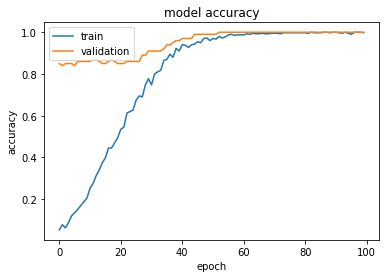

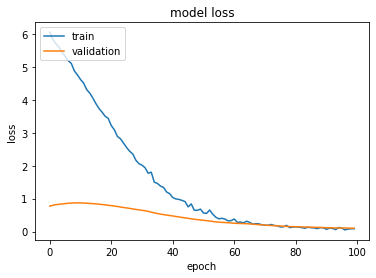

In [10]:
plot_hist(history)